In [9]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from numpy.random import *
from numpy.fft import *
import scipy as sp
from scipy import ndimage
import os
import pyfits as pf
import IPython
from scipy.interpolate import *
from scipy.integrate import odeint   
import healpy as hp
import tdpy_util



import seaborn as sns
sns.set(context='poster', style='dark', color_codes=True)

(100, 100)


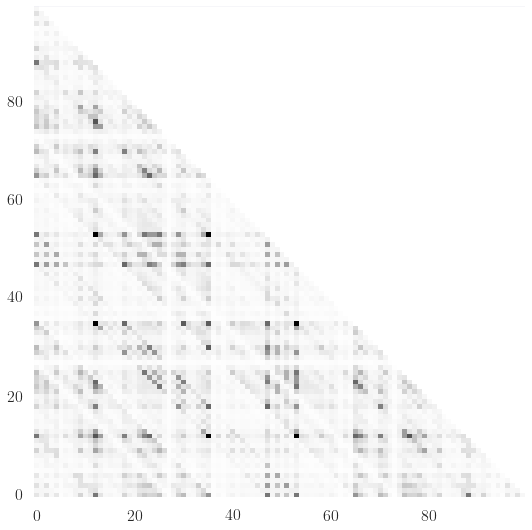

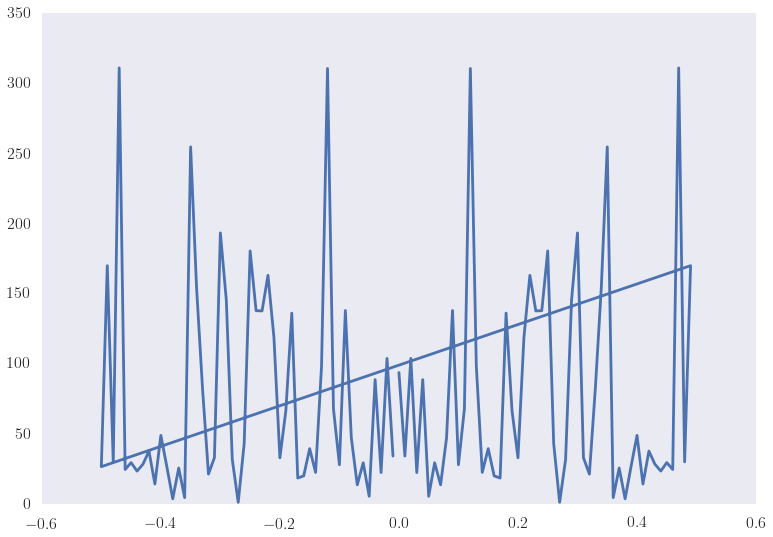

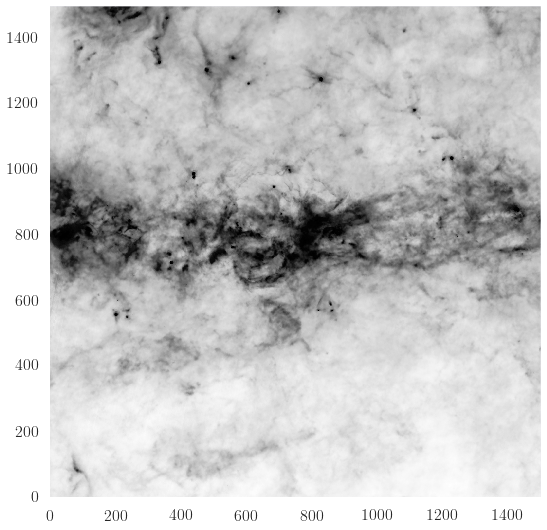

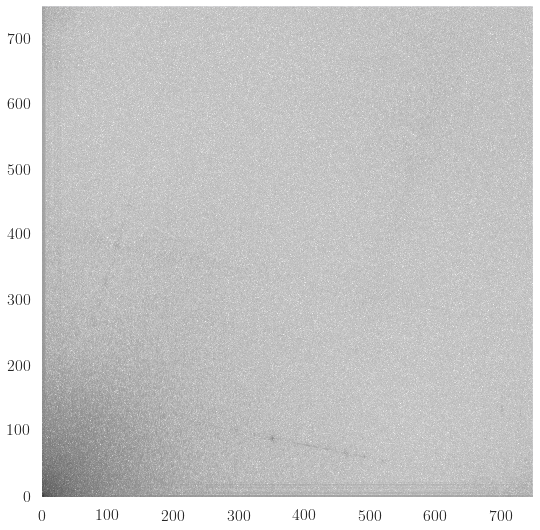

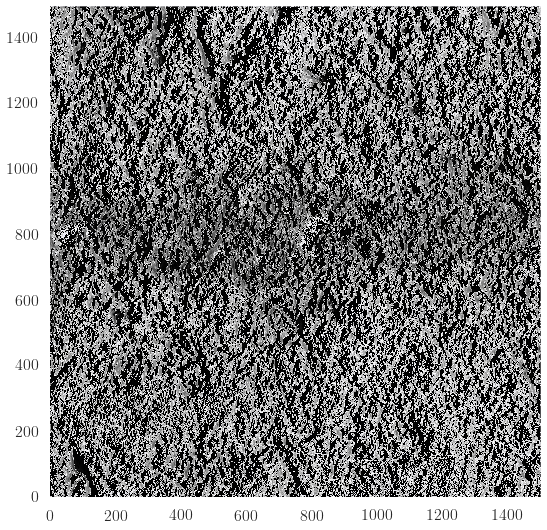

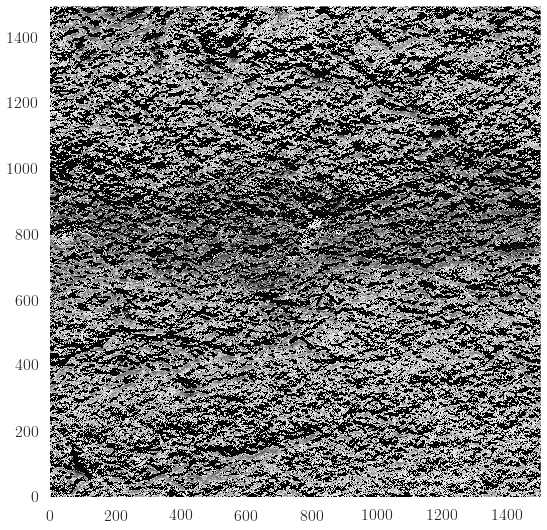

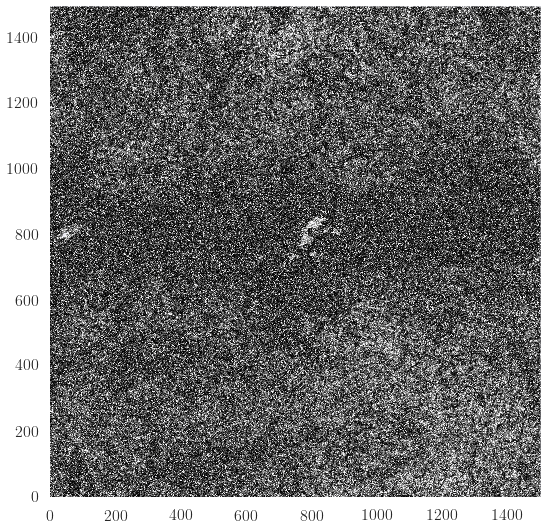

In [12]:
path = '/n/home15/tansu/git/local/tdwork/dust_strt/png/Galactic_Centre.jpg'
#path = os.environ["DUST_STRT_PATH"] + '/png/Galactic_Centre.jpg'
imag = ndimage.imread(path)

#jpixllimt = [1250, 1750]
jpixllimt = [750, 2250]
npixl = jpixllimt[1] - jpixllimt[0]
imag = imag[jpixllimt[0]:jpixllimt[1], jpixllimt[0]:jpixllimt[1], 0]

imagdtft = fft2(imag)[0:npixl/2, 0:npixl/2]

imagdtftreal = real(imagdtft)
imagpsec = absolute(imagdtft)**2



imagbsec = zeros((nsgnl, nsgnl))
for k in range(nsgnl):
    for l in range(nsgnl):
        if k + l <= nsgnl - 1:
            bspc[k, l] = absolute(sgnldtft[k] * sgnldtft[l] * conj(sgnldtft[k+l]))

            
print bspc.shape
plt.imshow(bspc, origin='lower')
plt.show()


psecsgnl = absolute(fft(sgnl))**2
fig, ax = plt.subplots()
ax.plot(freq, psecsgnl)
plt.show()



plt.imshow(imag, origin='lower')
plt.show()

fig, ax = plt.subplots()
ax.imshow(imagpsec, origin='lower', norm=matplotlib.colors.LogNorm())
plt.show()


imagderx = ndimage.sobel(imag, 1)  # horizontal derivative
imagdery = ndimage.sobel(imag, 0)  # vertical derivative
imagderm = sqrt(imagderx**2 + imagdery**2) # hypot(imagderx, imagdery)  # magnitude


fig, ax = plt.subplots()
ax.imshow(imagderx, origin='lower', norm=matplotlib.colors.LogNorm())
plt.show()

fig, ax = plt.subplots()
ax.imshow(imagdery, origin='lower', norm=matplotlib.colors.LogNorm())
plt.show()

fig, ax = plt.subplots()
ax.imshow(imagderm, origin='lower', norm=matplotlib.colors.LogNorm())
plt.show()

